In [22]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [23]:
df=pd.DataFrame()

In [24]:
df['x1']=[1,2,3,4,5,6,7,8,9]
df['x2']=[5,3,6,8,1,9,5,8,9]
df['label']=[1,1,0,1,0,1,0,1,0]

In [25]:
df

,x1,x2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,7,5,0
7,8,8,1
8,9,9,0


<Axes: xlabel='x1', ylabel='x2'>

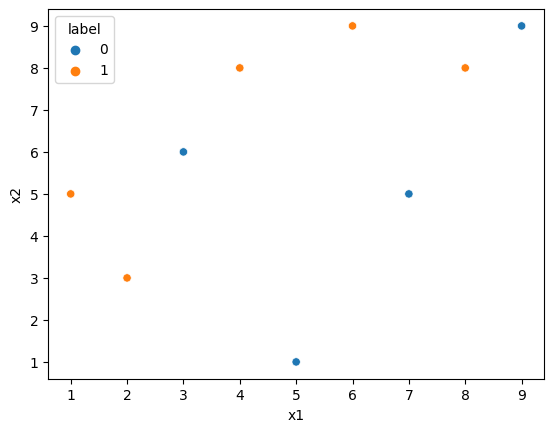

In [26]:
import seaborn as sns
sns.scatterplot(x=df['x1'],y=df['x2'],hue=df['label'])

In [27]:
df['weights']=1/df.shape[0]

In [28]:
df

,x1,x2,label,weights
0,1,5,1,0.111111
1,2,3,1,0.111111
2,3,6,0,0.111111
3,4,8,1,0.111111
4,5,1,0,0.111111
5,6,9,1,0.111111
6,7,5,0,0.111111
7,8,8,1,0.111111
8,9,9,0,0.111111


In [29]:
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier(max_depth=1)

In [34]:
x=df.iloc[:,0:2].values
y=df.iloc[:,2].values

In [35]:
dt1.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.494\nsamples = 9\nvalue = [4, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.49\nsamples = 7\nvalue = [4, 3]')]

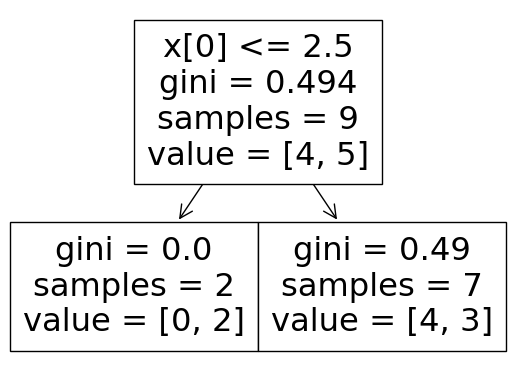

In [36]:
from sklearn.tree import plot_tree
plot_tree(dt1)

In [39]:
df['y_pred'] = dt1.predict(x)
    
df

,x1,x2,label,weights,y_pred
0,1,5,1,0.111111,1
1,2,3,1,0.111111,1
2,3,6,0,0.111111,0
3,4,8,1,0.111111,0
4,5,1,0,0.111111,0
5,6,9,1,0.111111,0
6,7,5,0,0.111111,0
7,8,8,1,0.111111,0
8,9,9,0,0.111111,0


In [40]:
def calculate_model_weight(error):

  return 0.5*np.log((1-error)/(error))

In [41]:
# Step 3 - calculate model weight
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [42]:

# Step 4 - Update weights
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [43]:

df['updated_weights'] = df.apply(update_row_weights,axis=1)
df

,x1,x2,label,weights,y_pred,updated_weights
0,1,5,1,0.111111,1,0.072787
1,2,3,1,0.111111,1,0.072787
2,3,6,0,0.111111,0,0.072787
3,4,8,1,0.111111,0,0.169615
4,5,1,0,0.111111,0,0.072787
5,6,9,1,0.111111,0,0.169615
6,7,5,0,0.111111,0,0.072787
7,8,8,1,0.111111,0,0.169615
8,9,9,0,0.111111,0,0.072787


In [44]:
df['updated_weights'].sum()

0.9455638540633564

In [45]:
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [46]:
df

,x1,x2,label,weights,y_pred,updated_weights,nomalized_weights
0,1,5,1,0.111111,1,0.072787,0.076977
1,2,3,1,0.111111,1,0.072787,0.076977
2,3,6,0,0.111111,0,0.072787,0.076977
3,4,8,1,0.111111,0,0.169615,0.179380
4,5,1,0,0.111111,0,0.072787,0.076977
5,6,9,1,0.111111,0,0.169615,0.179380
6,7,5,0,0.111111,0,0.072787,0.076977
7,8,8,1,0.111111,0,0.169615,0.179380
8,9,9,0,0.111111,0,0.072787,0.076977


In [47]:
df['nomalized_weights'].sum()

1.0

In [49]:


df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])
     

df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']
     

df[['x1','x2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]


,x1,x2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.111111,1,0.072787,0.000000,0.076977
1,2,3,1,0.111111,1,0.072787,0.076977,0.153954
2,3,6,0,0.111111,0,0.072787,0.153954,0.230931
3,4,8,1,0.111111,0,0.169615,0.230931,0.410310
4,5,1,0,0.111111,0,0.072787,0.410310,0.487287
5,6,9,1,0.111111,0,0.169615,0.487287,0.666667
6,7,5,0,0.111111,0,0.072787,0.666667,0.743644
7,8,8,1,0.111111,0,0.169615,0.743644,0.923023
8,9,9,0,0.111111,0,0.072787,0.923023,1.000000


In [50]:

def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices


In [51]:
index_values = create_new_dataset(df)

index_values


[7, 7, 0, 4, 5, 6, 4, 8, 3]

In [52]:

second_df = df.iloc[index_values,[0,1,2,3]]
     

second_df


,x1,x2,label,weights
7,8,8,1,0.111111
7,8,8,1,0.111111
0,1,5,1,0.111111
4,5,1,0,0.111111
5,6,9,1,0.111111
6,7,5,0,0.111111
4,5,1,0,0.111111
8,9,9,0,0.111111
3,4,8,1,0.111111


In [53]:

dt2 = DecisionTreeClassifier(max_depth=1)
     

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values
     

dt2.fit(X,y)


DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 3.0\ngini = 0.494\nsamples = 9\nvalue = [4, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.408\nsamples = 7\nvalue = [2, 5]')]

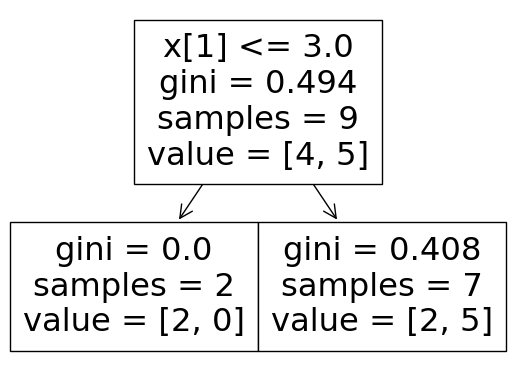

In [54]:
plot_tree(dt2)


In [55]:
second_df['y_pred'] = dt2.predict(X)
second_df

,x1,x2,label,weights,y_pred
7,8,8,1,0.111111,1
7,8,8,1,0.111111,1
0,1,5,1,0.111111,1
4,5,1,0,0.111111,0
5,6,9,1,0.111111,1
6,7,5,0,0.111111,1
4,5,1,0,0.111111,0
8,9,9,0,0.111111,1
3,4,8,1,0.111111,1


In [56]:
alpha2 = calculate_model_weight(0.1)
alpha2

1.0986122886681098

In [57]:

# Step 4 - Update weights
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)
     

second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)
     

second_df


,x1,x2,label,weights,y_pred,updated_weights
7,8,8,1,0.111111,1,0.037357
7,8,8,1,0.111111,1,0.037357
0,1,5,1,0.111111,1,0.037357
4,5,1,0,0.111111,0,0.037357
5,6,9,1,0.111111,1,0.037357
6,7,5,0,0.111111,1,0.330475
4,5,1,0,0.111111,0,0.037357
8,9,9,0,0.111111,1,0.330475
3,4,8,1,0.111111,1,0.037357


In [58]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()
     

second_df


,x1,x2,label,weights,y_pred,updated_weights,nomalized_weights
7,8,8,1,0.111111,1,0.037357,0.040498
7,8,8,1,0.111111,1,0.037357,0.040498
0,1,5,1,0.111111,1,0.037357,0.040498
4,5,1,0,0.111111,0,0.037357,0.040498
5,6,9,1,0.111111,1,0.037357,0.040498
6,7,5,0,0.111111,1,0.330475,0.358257
4,5,1,0,0.111111,0,0.037357,0.040498
8,9,9,0,0.111111,1,0.330475,0.358257
3,4,8,1,0.111111,1,0.037357,0.040498


In [59]:
second_df['nomalized_weights'].sum()

0.9999999999999999

In [61]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])
     

second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']
     

second_df[['x1','x2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]


,x1,x2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
7,8,8,1,0.111111,1,0.040498,0.000000,0.040498
7,8,8,1,0.111111,1,0.040498,0.040498,0.080996
0,1,5,1,0.111111,1,0.040498,0.080996,0.121494
4,5,1,0,0.111111,0,0.040498,0.121494,0.161992
5,6,9,1,0.111111,1,0.040498,0.161992,0.202490
6,7,5,0,0.111111,1,0.358257,0.202490,0.560747
4,5,1,0,0.111111,0,0.040498,0.560747,0.601245
8,9,9,0,0.111111,1,0.358257,0.601245,0.959502
3,4,8,1,0.111111,1,0.040498,0.959502,1.000000


In [62]:

index_values = create_new_dataset(second_df)
     

third_df = second_df.iloc[index_values,[0,1,2,3]]
     

third_df


,x1,x2,label,weights
3,4,8,1,0.111111
3,4,8,1,0.111111
4,5,1,0,0.111111
3,4,8,1,0.111111
4,5,1,0,0.111111
4,5,1,0,0.111111
4,5,1,0,0.111111
4,5,1,0,0.111111
5,6,9,1,0.111111


In [63]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)


DecisionTreeClassifier(max_depth=1)

In [64]:

third_df['y_pred'] = dt3.predict(X)
     

third_df


,x1,x2,label,weights,y_pred
3,4,8,1,0.111111,1
3,4,8,1,0.111111,1
4,5,1,0,0.111111,1
3,4,8,1,0.111111,0
4,5,1,0,0.111111,1
4,5,1,0,0.111111,1
4,5,1,0,0.111111,0
4,5,1,0,0.111111,1
5,6,9,1,0.111111,1


In [65]:

alpha3 = calculate_model_weight(0.7)
alpha3


-0.4236489301936017

In [66]:
print(alpha1,alpha2,alpha3)


0.42364893019360184 1.0986122886681098 -0.4236489301936017


In [67]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1])

In [68]:
dt2.predict(query)

array([1])

In [69]:
dt3.predict(query)

array([1])

In [70]:
alpha1*1 + alpha2*(1) + alpha3*(1)
     
#1.09861228866811

np.sign(1.09)

1.0

In [71]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([0])

In [72]:
dt2.predict(query)


array([1])

In [73]:
dt3.predict(query)


array([1])

In [74]:

alpha1*(1) + alpha2*(-1) + alpha3*(-1)

-0.2513144282809062

In [75]:
np.sign(-0.25)

-1.0